# Statistik-Labor Testat Aufgabe 4
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
In den Dateien **sr_aufg_4_xy_MR1.txt**, **sr_aufg_4_xy_MR 2.txt** und **sr_aufg_4_xy_MR3.txt**
(*xy = Endziffern Ihrer Matrikelnummer*) finden Sie drei verschiedene Messreihen.<br> 
Es soll jeweils untersucht werden, ob bei der Messreihe eine Normalverteilung vorliegt und falls ja, welche Normalverteilung in Frage kommt.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein.

In [26]:
import pandas as pd

# Dateipfad zum Dataset-Ordner
path = '/home/gen69/Python/Statistics/Testate/datasets/Endziffer_01/'

# Einlesen der drei Messreihen-Dateien mit raw-string für sep
data = pd.read_csv(path + 'sr_aufg_4_01_MR1.txt', sep=r'\s+', decimal=',', header=None, names=['MR1'])
data['MR2'] = pd.read_csv(path + 'sr_aufg_4_01_MR2.txt', sep=r'\s+', decimal=',', header=None)
data['MR3'] = pd.read_csv(path + 'sr_aufg_4_01_MR3.txt', sep=r'\s+', decimal=',', header=None)

# Kontrolle
#print(data.head())



## 2. Kennzahlen bestimmen
Berechnen Sie für jeden der drei Messreihen **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite**.

***Beispiellösung:***<br>
Bitte geben Sie die Kennzahlen in tabellarischer Form ab.

In [27]:
import pandas as pd

# Statistische Kennzahlen berechnen
stats = pd.DataFrame({
    'Mittelwert': data.mean(),
    'Varianz': data.var(ddof=1),
    'Standardabweichung': data.std(ddof=1),
    'Median': data.median(),
    'Spannweite': data.max() - data.min()
})

# Rundung (optional)
stats = stats.round(3)

# Ausgabe der Tabelle
print(stats)


     Mittelwert  Varianz  Standardabweichung   Median  Spannweite
MR1     533.969    3.901               1.975  533.941       9.958
MR2      36.412    0.178               0.421   36.260       1.996
MR3       7.041    5.338               2.310    7.305       5.926


## 3. Histogramme erstellen
Erstellen Sie für jeden der drei Messreihen ein Histogramm. <br>
Erläutern Sie hierzu auch die Wahl der Klassen: 
- Wie viele Klassen haben Sie gewählt (und warum diese Anzahl von Klassen)? 
- Wie haben Sie die Klassengrenzen festgelegt und warum? Welche Funktion haben Sie beim Auszählen benutzt?

***Beispiellösung:***<br>
Darstellung aller 3 Histogramme mit zusätzlich der Beantwortung der Fragen.

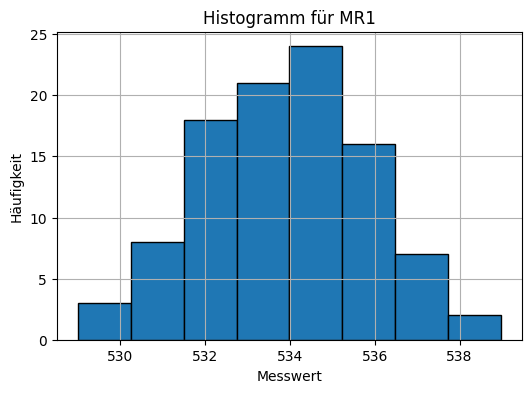

MR1: 8 Klassen, Klassenbreite ≈ 1.245


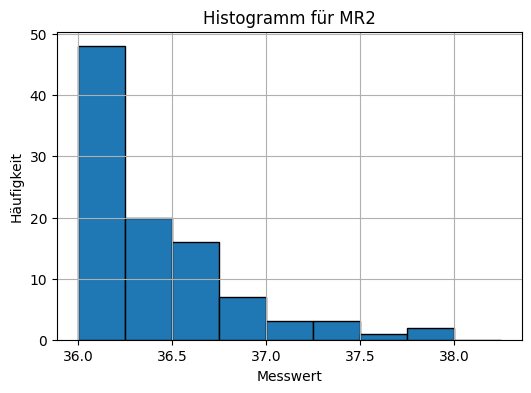

MR2: 8 Klassen, Klassenbreite ≈ 0.25


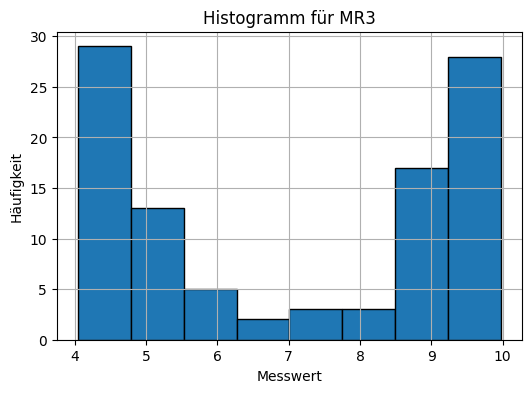

MR3: 8 Klassen, Klassenbreite ≈ 0.741


In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Anzahl Klassen bestimmen: Sturges-Formel
def sturges_rule(n):
    return int(np.ceil(1 + 3.322 * np.log10(n)))

# Histogramme für alle drei Messreihen
for col in data.columns:
    n = len(data[col])
    k = sturges_rule(n)  # Anzahl Klassen
    min_val = data[col].min()
    max_val = data[col].max()

    # Klassenbreite
    class_width = (max_val - min_val) / k

    # Klassengrenzen (inkl. Rand)
    bins = np.arange(min_val, max_val + class_width, class_width)

    # Plot
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=bins, edgecolor='black')
    plt.title(f'Histogramm für {col}')
    plt.xlabel('Messwert')
    plt.ylabel('Häufigkeit')
    plt.grid(True)
    plt.show()

    # Ausgabe zur Dokumentation
    print(f"{col}: {k} Klassen, Klassenbreite ≈ {round(class_width, 3)}")

    # Bantwortung der Fragen:

    # Anzahl klassen: Ich habe 8 klassen gewählt mithilfe der  Sturges-Formel

    # Klassengrenzen: zu betracht gezogen wurden => Untere Grenze = Minimum der Messreihe und Obere Grenze = Maximum + Klassenbreite
    # => die Klassenbreite war dann -> Klassenbreite = Spannweite/Anzahl-Klassen

    # Funktionen zum Auszählen: plt.hist()


## 4. Normalverteilte Daten erkennen
Entscheiden Sie anhand des Histogramms für jede der drei Messreihen, ob eine Normalverteilung vorliegt. Begründen Sie Ihre Entscheidung.

In [29]:
# --- M1 ---
# Ja eine Normalverteilung liegt vor weil, das Histogramm eine annähernd symmetrische, glockenförmige Verteilung ohne starke Ausreißer zeigt. Und die Daten sind unimodal.

# --- M2 ---
# Tendenziell leigt ein Normalverteilung. Es ist aber links-verschoben mit einem längeren Ausläufer nach oben.

# --- M3 ---
# Es liegt keine Normalverteilung vor weil, das Histogramm mehrere Häufungen hat und daher nicht unimodal ist und eine deutliche Asymmetrie besitzt.

## 5. Dichtekurve der Normalverteilung einzeichnen
Sofern bei einer Messreihe eine Normalverteilung vorliegt, erstellen Sie ein weiteres Diagramm, das sowohl das Histogramm als auch die (an das Histogramm angepasste) Dichtekurve der passenden Normalverteilung zeigt.
- Welche Normalverteilungsdichte haben Sie gezeichnet, d. h., welche Werte haben Sie für die Parameter $\mu$ bzw. $\sigma$ eingesetzt?

***Beispiellösung*** (für den Fall, dass bei Messreihe MR1 eine Normalverteilung vorliegt):
<div>
<img src="https://drive.google.com/uc?id=1iVJQvjVW9mvBWJ_V3a4rUMJ-fdgbzqg4" width="500"/>
</div>

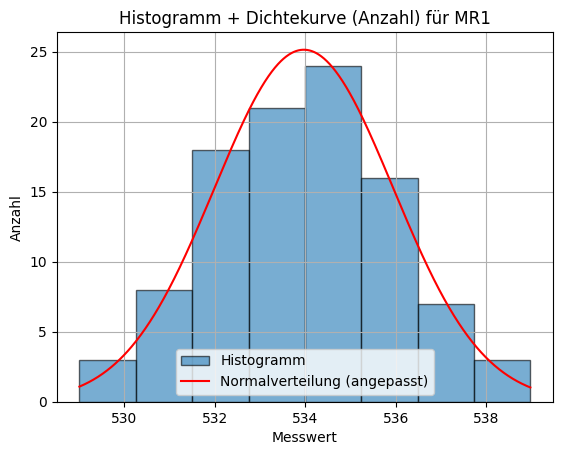

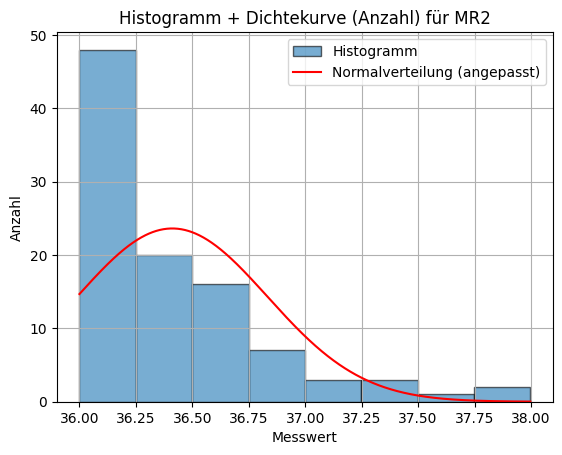

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Beispiel: MR1 (ersetze durch andere Spalte bei Bedarf)
col = 'MR1'
werte = data[col]

# Statistische Kennwerte
mu = werte.mean()
sigma = werte.std(ddof=1)

# Anzahl Werte
n = len(werte)

# Histogramm (absolute Häufigkeiten, keine Dichte)
count, bins, ignored = plt.hist(werte, bins='sturges', density=False, edgecolor='black', alpha=0.6, label='Histogramm')

# Klassenbreite (für Skalierung der PDF)
bin_width = bins[1] - bins[0]

# x-Werte für PDF
x = np.linspace(min(bins), max(bins), 1000)

# PDF berechnen und an Histogramm anpassen (Häufigkeit = PDF * n * Klassenbreite)
pdf = norm.pdf(x, mu, sigma) * n * bin_width

# Kurve plotten
plt.plot(x, pdf, 'r-', label='Normalverteilung (angepasst)')
plt.title(f'Histogramm + Dichtekurve (Anzahl) für {col}')
plt.xlabel('Messwert')
plt.ylabel('Anzahl')
plt.grid(True)
plt.legend()
plt.show()


# Für M2

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Beispiel: MR1 (ersetze durch andere Spalte bei Bedarf)
col = 'MR2'
werte = data[col]

# Statistische Kennwerte
mu = werte.mean()
sigma = werte.std(ddof=1)

# Anzahl Werte
n = len(werte)

# Histogramm (absolute Häufigkeiten, keine Dichte)
count, bins, ignored = plt.hist(werte, bins='sturges', density=False, edgecolor='black', alpha=0.6, label='Histogramm')

# Klassenbreite (für Skalierung der PDF)
bin_width = bins[1] - bins[0]

# x-Werte für PDF
x = np.linspace(min(bins), max(bins), 1000)

# PDF berechnen und an Histogramm anpassen (Häufigkeit = PDF * n * Klassenbreite)
pdf = norm.pdf(x, mu, sigma) * n * bin_width

# Kurve plotten
plt.plot(x, pdf, 'r-', label='Normalverteilung (angepasst)')
plt.title(f'Histogramm + Dichtekurve (Anzahl) für {col}')
plt.xlabel('Messwert')
plt.ylabel('Anzahl')
plt.grid(True)
plt.legend()
plt.show()


# Zusatzfrage:
# Für M1 = Mittelwert: μ=533.97  , Standardabweichung: σ=1.98
# Für M2 = Mittelwert: μ=36.41  ,  Standardabweichung: σ=0.42

## 6. Erläuterungen zur Dichtekurve
Erläutern Sie zu dem bei 5. gezeichneten Diagramm:
- Um welchen Faktor unterscheiden sich die im Histogramm dargestellten Anzahlen von den Funktionswerten der Normalverteilungsdichte?
- Wie haben Sie diesen Faktor bei der Erstellung des Diagramms berücksichtigt? Mussten Sie die Skalierung der y-Achse(n) ändern? Wenn ja, wie? Wenn nein, warum nicht?

In [31]:
# 1. Frage:
# Die im Histogramm dargestellten Werte sind absolute Häufigkeiten. Die Normalverteilungsdichte f(x)gibt dagegen Wahrscheinlichkeitsdichten an,
# die eine Fläche unter der Kurve von 1 über das gesamte Intervall haben.
# => Damit man beide Kurven im gleichen Diagramm vergleichen kann, müssen die Dichtewerte deshalb skaliert werden.

# 2. Frage:
# Der Faktor ist = n (gesamtzahl-messwete) * Klassenbreite
# => Beim Plotten des Histogramms wurde density=False gesetzt, sodass die y-Achse absolute Häufigkeiten zeigt.
# Die Normalverteilungsdichte wurde mit dem Faktor n×Klassenbreiten multipliziert, um auf die gleiche Skala wie das Histogramm zu kommen.
# -> Somit war keine Anpassung der y-Achse notwendig, da beide Darstellungen jetzt dieselbe Einheit (Anzahl) auf der y-Achse verwenden.